In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv')
data = data.dropna()

In [4]:
corr = data.corr()
vars = []

for i in range(len(corr["Bankrupt?"])):
    if abs(corr["Bankrupt?"][i]) > 0.15:
        vars.append(corr["Bankrupt?"].index[i])

/var/folders/f9/jdxhns6s5xqbjc5h71x7s2740000gn/T/ipykernel_2764/254387578.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr["Bankrupt?"][i]) > 0.15:


In [5]:
data = data[vars]
display(data.head())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,...,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Current Liabilities/Equity,Retained Earnings to Total Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
0,1,0.370594,0.424389,0.405750,0.147950,0.147950,0.147950,0.169141,0.138736,0.207576,...,0.137757,0.672775,0.147308,0.339077,0.903225,0.339077,0.118250,0.716845,0.827890,0.290202
1,1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.171176,...,0.168962,0.751111,0.056963,0.329740,0.931065,0.329740,0.047775,0.795297,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.207516,...,0.148036,0.829502,0.098162,0.334777,0.909903,0.334777,0.025346,0.774670,0.836774,0.290189
3,1,0.399844,0.451265,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.151465,...,0.147561,0.725754,0.098715,0.331509,0.906902,0.331509,0.067250,0.739555,0.834697,0.281721
4,1,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.106509,...,0.167461,0.751822,0.110195,0.330726,0.913850,0.330726,0.047725,0.795016,0.839973,0.278514


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Check for missing n if theree is fill with median
missing_values = data.isnull().sum()
data.fillna(data.median(), inplace=True)
data = data.drop_duplicates()


#removes outliers


for column in data.columns[1:]:  # Skip the first column as it's the target variable
        df = data
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower_limit, upper_limit)


#feature scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Bankrupt?']))
scaled_df = pd.DataFrame(scaled_features, columns=data.columns[1:])


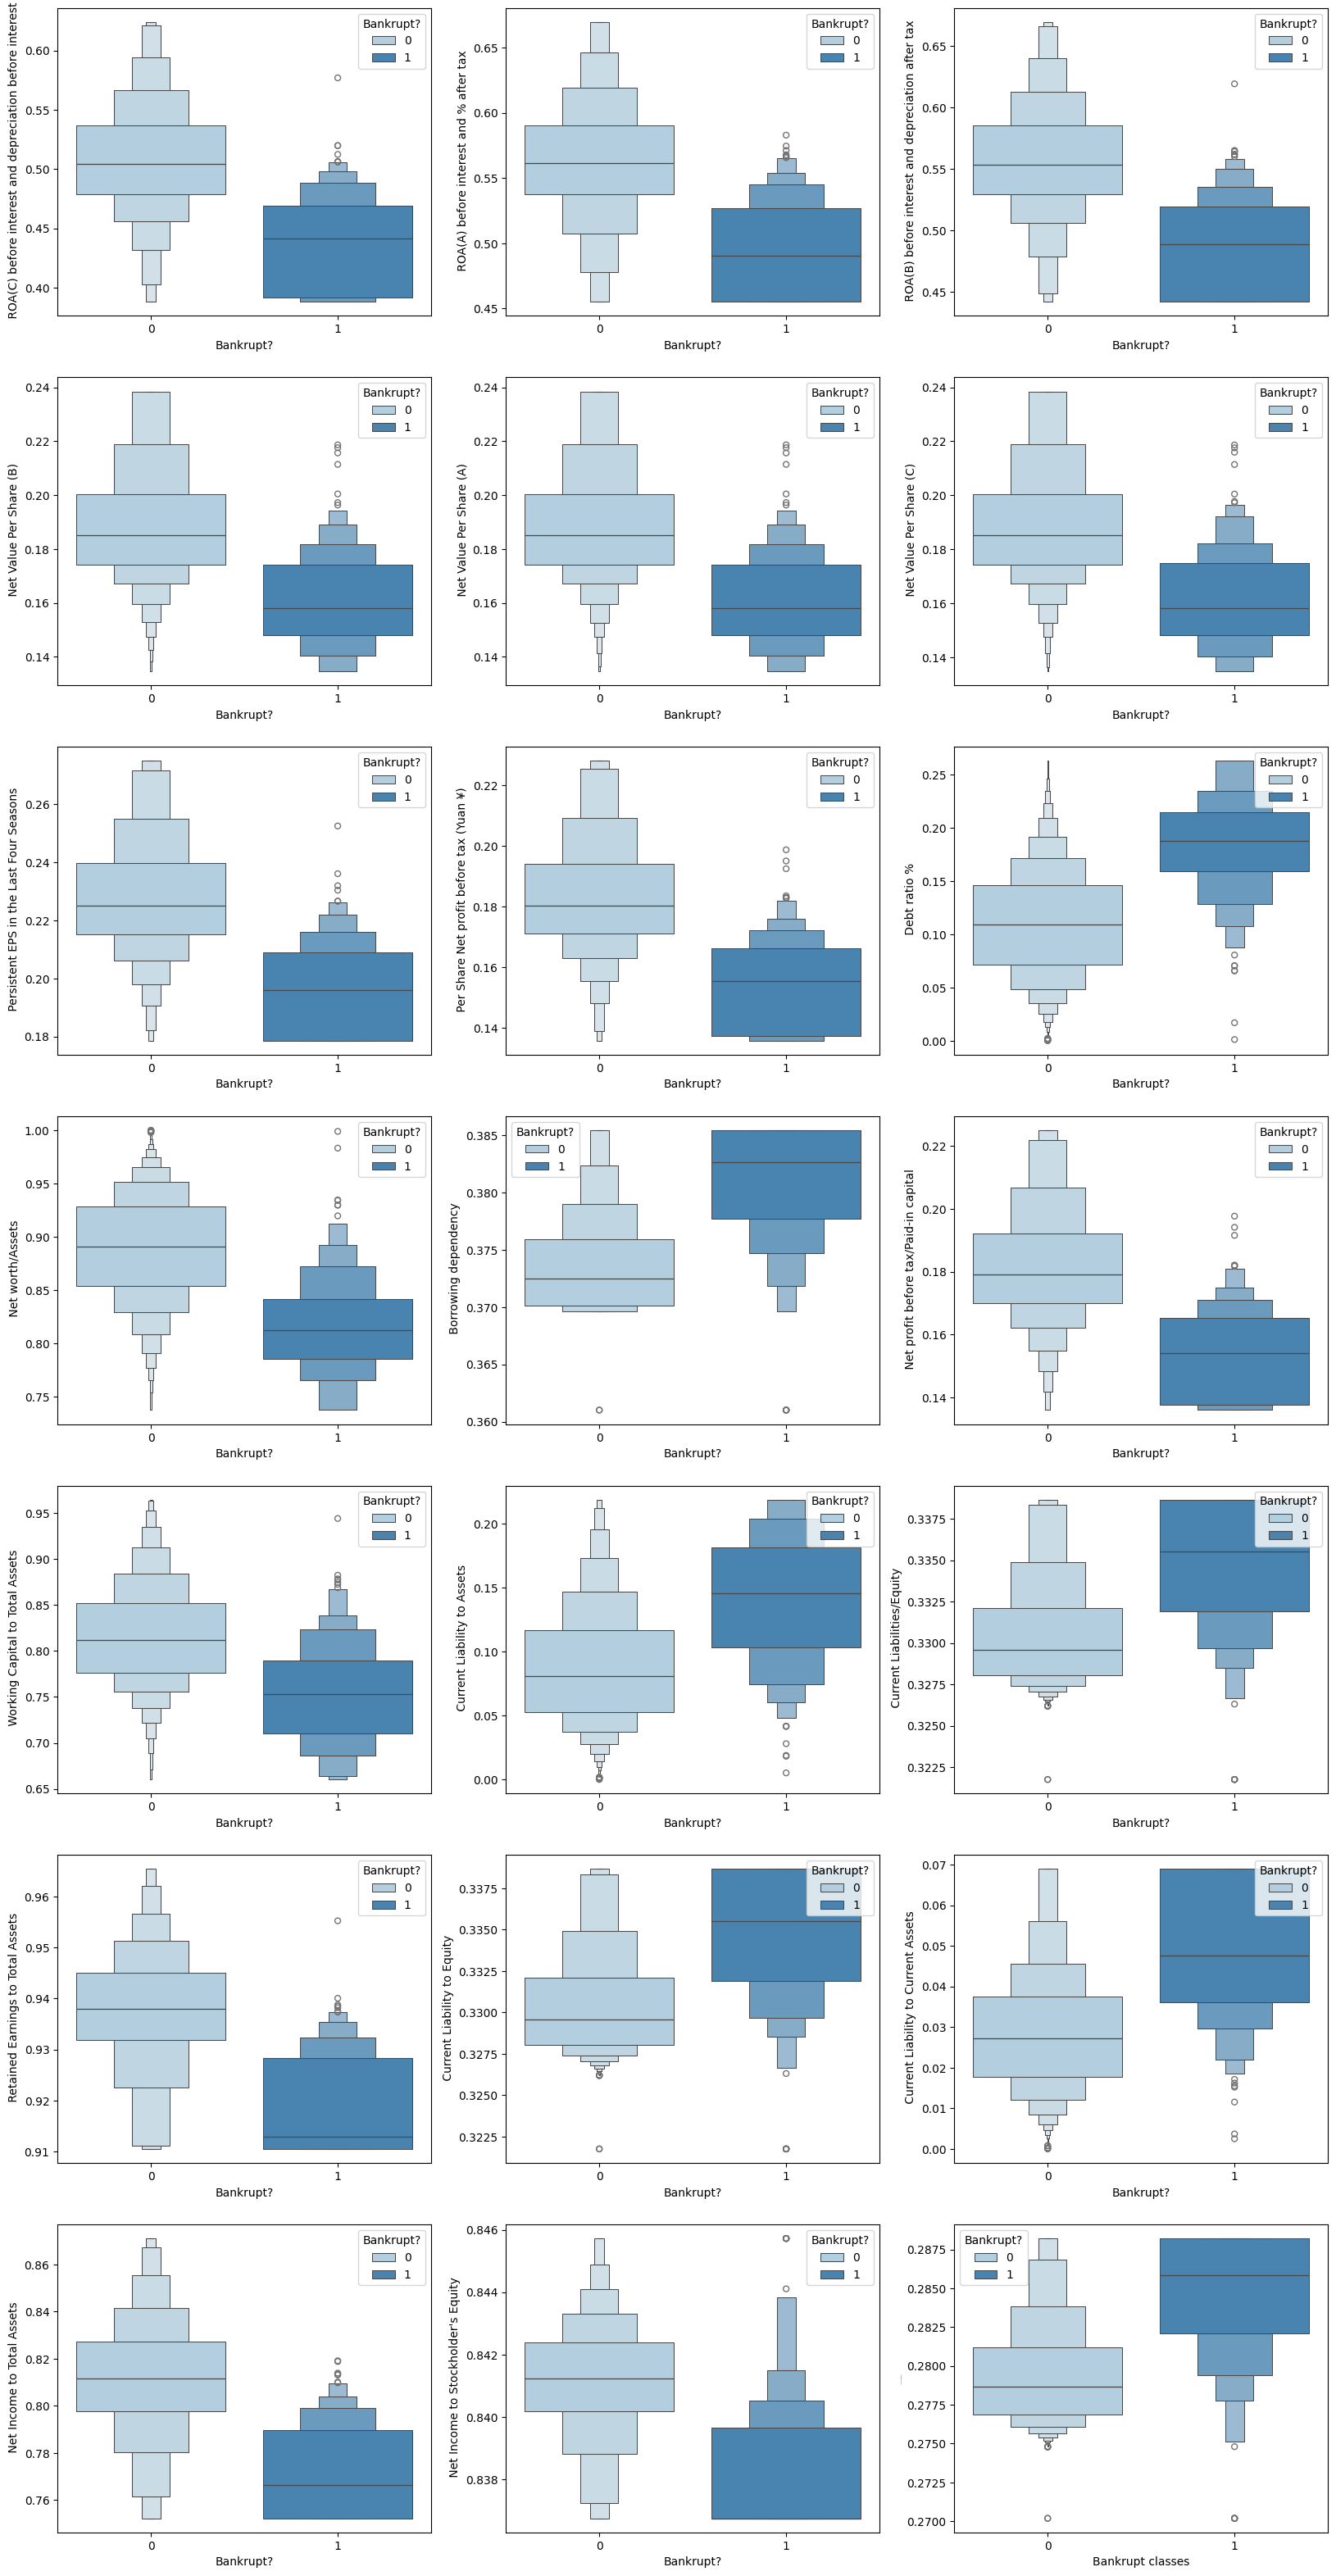

In [7]:
fig, axes = plt.subplots(len(vars) // 3, 3, figsize=(20, 40))
i, j = 0, 0
for var in vars:
    if var == "Bankrupt?":
        continue
    sns.boxenplot(ax = axes[i, j], x="Bankrupt?", y=var, data=data, palette="Blues", hue = "Bankrupt?")
    plt.xlabel("Bankrupt classes")
    plt.ylabel(var, fontsize= 1)
    j += 1
    if j == 3:
        j = 0
        i += 1

In [8]:
X = scaled_df
y = data['Bankrupt?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,...,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Current Liability to Assets,Current Liabilities/Equity,Retained Earnings to Total Assets,Current Liability to Equity,Current Liability to Current Assets,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity
0,1,0.387973,0.455122,0.442034,0.147950,0.147950,0.147950,0.178548,0.138736,0.207576,...,0.137757,0.672775,0.147308,0.338662,0.910524,0.338662,0.068886,0.752193,0.836752,0.288207
1,1,0.464291,0.538214,0.516730,0.182251,0.182251,0.182251,0.208944,0.169918,0.171176,...,0.168962,0.751111,0.056963,0.329740,0.931065,0.329740,0.047775,0.795297,0.839969,0.283846
2,1,0.426071,0.499019,0.472295,0.177911,0.177911,0.193713,0.180581,0.142803,0.207516,...,0.148036,0.829502,0.098162,0.334777,0.910524,0.334777,0.025346,0.774670,0.836774,0.288207
3,1,0.399844,0.455122,0.457733,0.154187,0.154187,0.154187,0.193722,0.148603,0.151465,...,0.147561,0.725754,0.098715,0.331509,0.910524,0.331509,0.067250,0.752193,0.836752,0.281721
4,1,0.465022,0.538432,0.522298,0.167502,0.167502,0.167502,0.212537,0.168412,0.106509,...,0.167461,0.751822,0.110195,0.330726,0.913850,0.330726,0.047725,0.795016,0.839973,0.278514


## Oversampling and Model Selection

Using SMOTE to see if it is a better choice or not. 

In [9]:
from imblearn.over_sampling import SMOTE

ada = SMOTE()
X_train_res, y_train_res = ada.fit_resample(X_train, y_train)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Neural Network": MLPClassifier(learning_rate='adaptive', max_iter=1000),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    results[name] = cv_scores.mean()

for model, score in results.items():
    print(f"{model}: Mean ROC AUC = {score:.4f}")


Logistic Regression: Mean ROC AUC = 0.9325
Decision Tree: Mean ROC AUC = 0.6245
Random Forest: Mean ROC AUC = 0.9135
Gradient Boosting: Mean ROC AUC = 0.9198
Support Vector Machine: Mean ROC AUC = 0.8028
Neural Network: Mean ROC AUC = 0.9175
XGBoost: Mean ROC AUC = 0.9113
AdaBoost: Mean ROC AUC = 0.9092


In [11]:
from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:\n", classification_report(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1985
           1       0.48      0.23      0.31        61

    accuracy                           0.97      2046
   macro avg       0.73      0.61      0.65      2046
weighted avg       0.96      0.97      0.96      2046

Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1985
           1       0.23      0.21      0.22        61

    accuracy                           0.96      2046
   macro avg       0.60      0.60      0.60      2046
weighted avg       0.95      0.96      0.95      2046

Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1985
           1       0.33      0.10      0.15        61

    accuracy                           0.97      2046
   macro avg       0.65      0.55      0.57      2046
weighted avg       0

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [13]:
strat_kfold = StratifiedKFold(n_splits=8)

## Neural Network Tuning

#### Round 1 of Hyperparameter Tuning

In [13]:

param_grid = {
    'hidden_layer_sizes': [(22,), (50, 12), (100, 50, 25)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPClassifier(max_iter=200), param_grid, refit=True, verbose=2, cv=strat_kfold, scoring='f1')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

# Using the best parameters to predict the test data
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

Fitting 8 folds for each of 72 candidates, totalling 576 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, s

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END a

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   5.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   6.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   7.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   4.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   5.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   5.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, sol

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  11.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  11.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  10.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   3.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  11.1s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  11.3s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  11.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=  11.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=  12.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=  15.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=  11.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   6.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   9.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   9.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.0s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   9.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.05,

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=tanh, alpha=0.05, hidden_

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  11.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   9.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   5.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   8.1s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   4.0s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=s

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  10.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   6.8s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   4.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activatio

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.3s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.1s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   6.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   5.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   4.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   5.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   5.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   4.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, sol

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   9.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   8.0s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   8.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   7.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   8.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   9.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=  10.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   9.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   9.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   9.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   7.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  10.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   5.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adapti

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   9.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   6.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=adam; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=sgd; total time=   1.4s
[CV] END activation=relu, alpha=

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   7.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   6.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   6.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   7.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   6.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   5.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total t

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   9.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   9.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  17.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  12.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=  10.5s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   7.8s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=adam; total time=   7.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   7.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.3s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.0s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   8.2s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   7.9s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=sgd; total time=   7.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   8.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   8.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   7.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   7.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   8.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   8.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   8.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=  

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.6

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solv

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=adam; total time=   1.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   1.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   1.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   2.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   2.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=constant, solver=sgd; total time=   2.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25),

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   6.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   5.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   9.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] 

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(22,), learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END a

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=constant, solver=adam; total time=   1.5s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.3s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total time=   1.0s
[CV] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 12), learning_rate=adaptive, solver=sgd; total tim

#### Round 2 of Hyperparameter Tuning

In [14]:
param_grid = {
    'hidden_layer_sizes': [(100, 100), (100, 50, 25), (100, 100, 100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['adaptive'],
}

grid = GridSearchCV(MLPClassifier(max_iter=200), param_grid, refit=True, verbose=2, cv=strat_kfold, scoring='recall')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

# Using the best parameters to predict the test data
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

Fitting 8 folds for each of 6 candidates, totalling 48 fits


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  16.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  17.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  16.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  19.5s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  28.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  20.4s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  17.1s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  13.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  10.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  10.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  11.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  12.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  18.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  11.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), learni

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  13.3s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  12.0s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  12.9s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  12.8s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  12.3s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  12.6s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  14.2s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, solver=adam; total time=  12.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.7s


/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  13.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=   9.9s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  12.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50, 25), learning_rate=adaptive, solver=adam; total time=  11.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  14.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adapti

#### Round 3 of Hyperparameter Tuning

In [15]:
param_grid = {
    'hidden_layer_sizes': [(100, 100, 100), (100, 100, 100, 100)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['adaptive'],
}

grid = GridSearchCV(MLPClassifier(max_iter=200), param_grid, refit=True, verbose=2, cv=strat_kfold, scoring='recall')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

# Using the best parameters to predict the test data
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  13.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  12.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  11.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  15.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  20.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  21.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=adaptive, solver=adam; total time=  11.8s
[CV] END activation=rel

<i>We see that the performance of the Neural Networks does not improve too much with tuning, so let's look at SVMs</i>

### Training the SVM with the SMOTE data